In [1]:
from src.models.NBC import NBC
from src.models.TI_NBC import TI_NBC
from src.models.sklearn_NBC import sklearn_NBC
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "fcps"
dataset = "engytime"
methods = ["TI_NBC", "NBC", "sklearn_NBC", "sklearn_kmeans"]
k = 120

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [5]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 36.4 s
Wall time: 38.8 s


## TI-NBC

In [6]:
%%time
model = TI_NBC(k)
results["TI_NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 26.4 s
Wall time: 27.7 s


## NBC using sklearn.neighbors

In [7]:
%%time
model = sklearn_NBC(k)
results["sklearn_NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 109 ms
Wall time: 129 ms


## Comparison

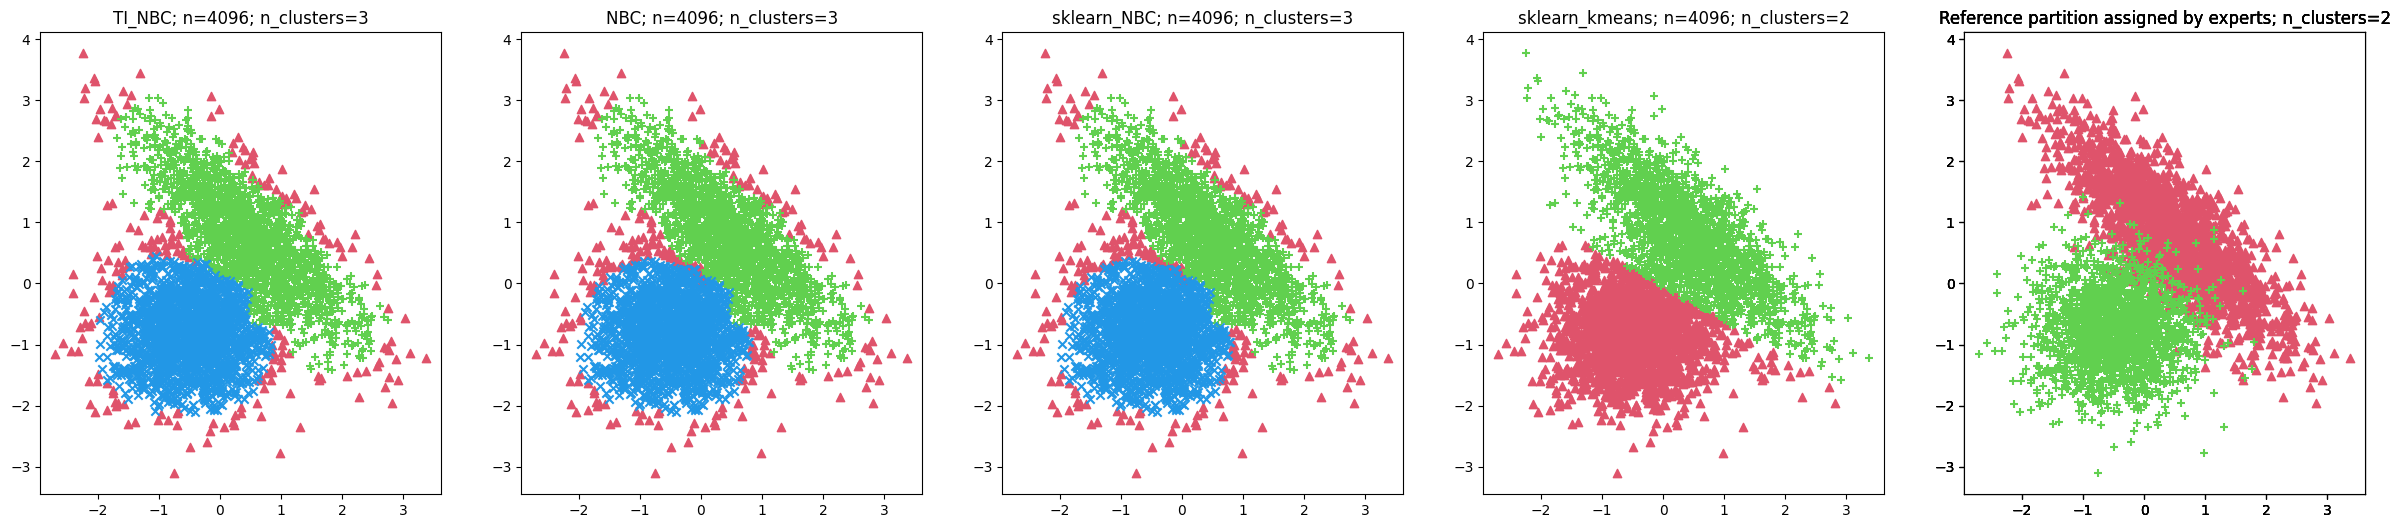

In [8]:
plot_results(benchmark.data, methods, results, reference)

In [9]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=120
╒════════════════════╤════════════════════╤════════════════════╤════════════════╕
│ TI_NBC             │ NBC                │ sklearn_NBC        │ sklearn_kmeans │
│ [[ 107 1918   23]  │ [[ 119 1904   25]  │ [[ 119 1904   25]  │ [[  46 2002]   │
│  [ 106  119 1823]] │  [ 141  107 1800]] │  [ 141  107 1800]] │  [1895  153]]  │
╘════════════════════╧════════════════════╧════════════════════╧════════════════╛


In [10]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=120
╒═════════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│ TI_NBC                  │ NBC                      │ sklearn_NBC              │ sklearn_kmeans           │
│ ar: 0.7719863820373629  │ ar: 0.7605281001612192   │ ar: 0.7605281001612192   │ ar: 0.815060637690859    │
│ r: 0.8859958075778388   │ r: 0.880267356341575     │ r: 0.880267356341575     │ r: 0.907530262706044     │
│ fm: 0.881425936253763   │ fm: 0.8746413673643071   │ fm: 0.8746413673643071   │ fm: 0.9076346454086384   │
│ afm: 0.7737713571827841 │ afm: 0.7631050847743881  │ afm: 0.7631050847743881  │ afm: 0.8150621549910287  │
│ mi: 0.5161982034441062  │ mi: 0.5150787852416245   │ mi: 0.5150787852416245   │ mi: 0.5052238253781409   │
│ nmi: 0.6645743056315262 │ nmi: 0.652981014772627   │ nmi: 0.652981014772627   │ nmi: 0.7296025389701782  │
│ ami: 0.6644686972986417 │ ami: 0.6528734522173634  │ ami: 0.6528734522173634  │ ami: 0.7295548463219651  │
│ np